In [2]:
from IPython.display import HTML, display

def display_images_table(images, images_per_row=None):
    if images_per_row is None:
        images_per_row = len(images)
    html = '<table><tr>'
    for count,image in enumerate(images):
        if count % images_per_row == 0:
            html += f"</tr><tr>"
        html += f"<td><img src='{image}'></td>"
    html += '</tr></table>'
    display(HTML(html))

logos = [    
    'images/logos/jupyter-logo.png',
    'images/logos/Scikit_learn_logo_small.svg',
    'images/logos/pytorch-logo.png',
    'images/logos/fast-ai-logo.png',
]

# Jupyter, GPU, Python and DataScience

    AI will rule the world - time to scratch the surface.


A (very) short introduction to Machine-Learning using Jupyter and sklearn (and fast.ai).

In [3]:
display_images_table(logos, 4)

**About me**

```bash
$ whoami
nicola <nicola.jordan@hsr.ch>
```


```bash
$ whereis nicola
IFS - Institute for Software
```


Not so important... more important:

## What am I a showing today?

```bash
$ slides-and-jupyter-notebook
https://krzl.ch/colloqium-2018/
```

### Part 1: My Stack - Docker, Jupyter and GPUs

1. GPUs vs CPUs
1. Docker with nvidia-docker
1. Jupyter - what, why, when

### Part 2: Machine Learning/Datascience with three commonly used algortihms

1. DataScience - just Statistics
1. Supervised Learning: MNIST
1. Unsupervised Learning: k-Means ("fake" data for illustration)
1. Reinforcement Learning: Just basics
1. Wrap-Up

# My Stack - Docker, Jupyter and GPUs


## GPU vs CPU - raise of the machine (learning)


*Hint to myself*: Start GPU vs. CPU Online

In [4]:
%matplotlib notebook
import pandas
CPU = [
    'General/Multi Purpose Computing Unit',
    'Calculating anything',
    'strong single processor',
    'GFLOPs',
    'rather standardized',
    'task change: OK',
]
GPU = [
    'Specialized Computing Unit',
    'strong in matrix calcluations',
    'weak single processor, strong in numbers',
    'TFLOPs',
    "branded, each with it's own architecture",
    'task change: Not OK',
]

df = pandas.DataFrame({'CPUs': CPU, 'GPUs': GPU})
print(df.to_string())

                                   CPUs                                      GPUs
0  General/Multi Purpose Computing Unit                Specialized Computing Unit
1                  Calculating anything             strong in matrix calcluations
2               strong single processor  weak single processor, strong in numbers
3                                GFLOPs                                    TFLOPs
4                   rather standardized  branded, each with it's own architecture
5                       task change: OK                       task change: Not OK


![](images/computer-brain.jpeg)

## Python

Yes, I'm using Python, the programming language, not the snake.

## My current Stack

* Docker, nvidia enabled
    * different machines: local laptop, server, "cloud"
* "web-app": Jupyter-Notebooks
    * can run locally, on google colab, AWS, Azure....

## Docker



Only "real" reason[1] for docker is to be able to run Jupyter-Notebooks on our own servers and locally; and installation of often used software-packages is faster, because it is installed in the container-image.

[1]: of course not true! But looking only through the lense of DataScience this might be a valid point.

Advantages:

* doesn't mess up my system
* build containers on top of pre-existing ones
* once it runs, it runs in the cloud (but an NVIDIA GPU required for speed)
* can run different versions of the same stacks/software...


Disadvantages:


* requires loads of time to configure correctly
* OOM on local machine b/c other stuff is running as well
* yet another stack and windows users are left out

## Jupyter

**History**: Has been born from an enhanced Python interactive shell (ipython).

The name *Jupyter* is an indirect acronym of the three core languages it was designed for:

**JU**lia, **PYT**hon, and **R** and is inspired by the planet Jupiter.

![](images/notebook_components.png)


    The kernel (the part where the user's code runs) runs an event loop.
    This handles both the user sending code to be executed, 
    and other events such as widget callbacks.
    However, it doesn't use separate threads for this, 
    so if the user executes a cell containing 'time.sleep(10)', 
    the event loop can't handle anything else until it's finished.



**Jupyter**

Two important terms

* Kernel (think "core component as a runtime environment, each in its own space")
* Jupyter Server: Web Platform to edit and run your notebooks (`ipynb`)
    * Has a standardised UI
    * standardised communication (aka protocol) for UI to Kernel communication
    * that's why ie. google collab and jupyter look different but do roughly the same

ie. https://colab.research.google.com/drive/1kf66j7yOySJLfvih9fFGZeSORyxr8btK
or https://mybinder.org/ for plain displaying of data.

### Jupyter - the good and the bad and the ugly

#### the good

* quite portable
* large community
* lots of supported languages
* fairly easy to write new kernels
* keeps track of what has been run inside kernel
* there are lots of examples for ML/AI/DataScience!

-> has been getting a favorite position in sharing DataScience

#### the bad

* depends, but the REPL (Read–eval–print loop) has limitations
* The kernel keeps results from above cells which makes some usecases hard


#### the ugly

* no long running processes (browser needs to run, timout issues)

This won't change anytime soon in my opinion, since that is an architectural question.

### When

* If you are exploring data
* larger data that many people work on
* validate your model
* Create exercises
* need different environments (online)

### Not

* long running tasks, everything above a few minutes is problematic
* doesn't fit your problem
* you don't like it
* or have a better alternative (let me know, please)

# DataScience and Machine Learning (ML)

    ML: more or less applying statistics to large/big/huge datasets

You can google the definition(s) and pick the one you like best.

ML be categorized roughly into three types:

* Supervised Learning
    * where it is known, what the goal to reach is
* Unsupervised Learning 
    * which tries to find "correct" rules
* Reinforced Learning
    * which uses new data to adapt, improvise and overcome

## DataScience - know your data

We are using **Toydatasets** for demo purposes.

### Iris (flower) Dataset

<IPython.core.display.Javascript object>


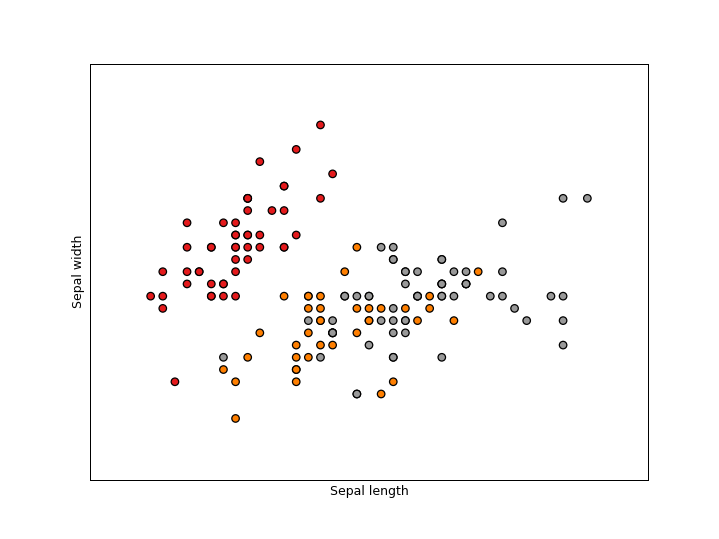

In [5]:
%matplotlib notebook
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show();

<IPython.core.display.Javascript object>


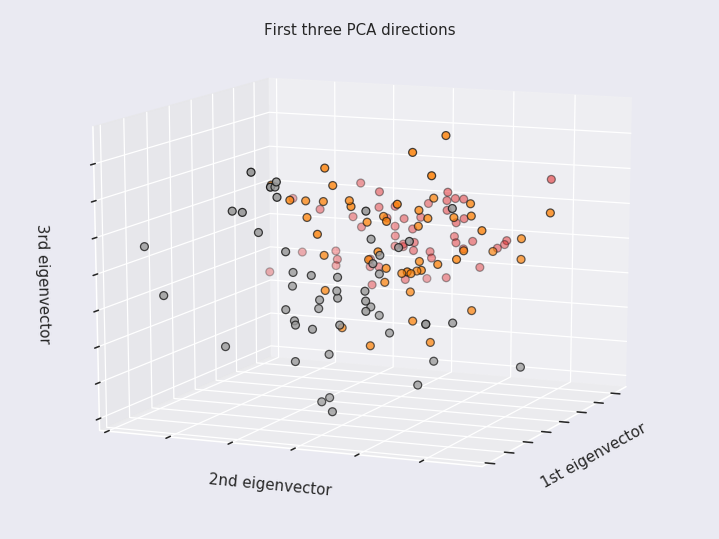

In [15]:
%matplotlib notebook
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## ML - Supervised Learning

    "classification of knowns"

We are using **Toydatasets** for demo purposes.

**BORING** ;-)

### MNIST (Handwritten numbers)

<IPython.core.display.Javascript object>


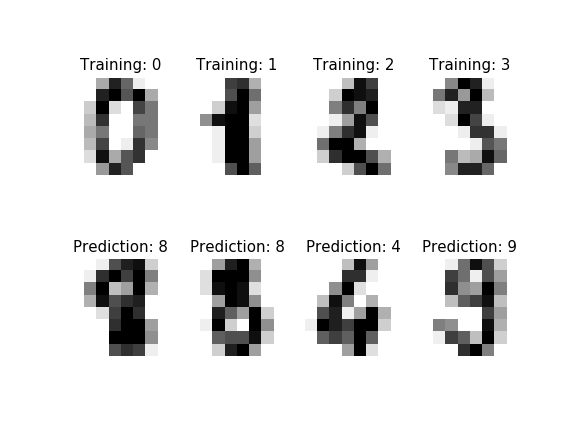

In [6]:
%matplotlib notebook
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

accuracy: 0.9688542825361512


<IPython.core.display.Javascript object>


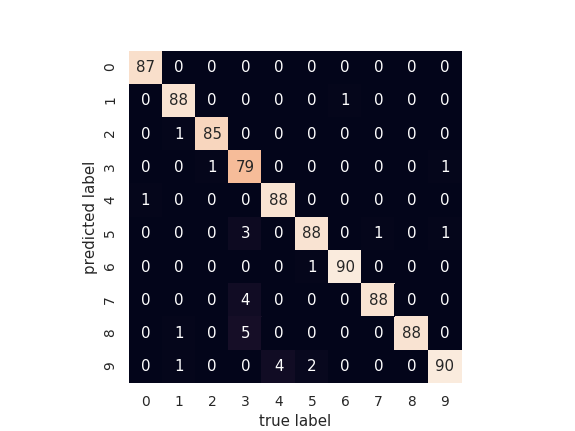

In [73]:
%matplotlib notebook
from scipy.stats import mode
from sklearn.metrics import accuracy_score
    
print('accuracy:', accuracy_score(expected, predicted))

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(expected, predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## ML - Unsupervised Learning

    "classification of unknowns"

### K-Means


The algorithm is very simple:

1. Select the number of clusters N you want to find
2. Guess N random centroids
3. While centroids change:
      - Create clusters by assigning each point to the nearest centroid
4. For each cluster, define the new centroid as the centroid of all points assigned to it

Dataset from: sklearn

```python
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
```

<IPython.core.display.Javascript object>


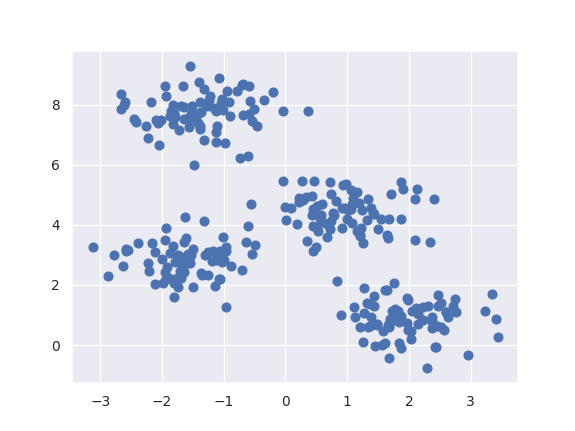

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

<IPython.core.display.Javascript object>


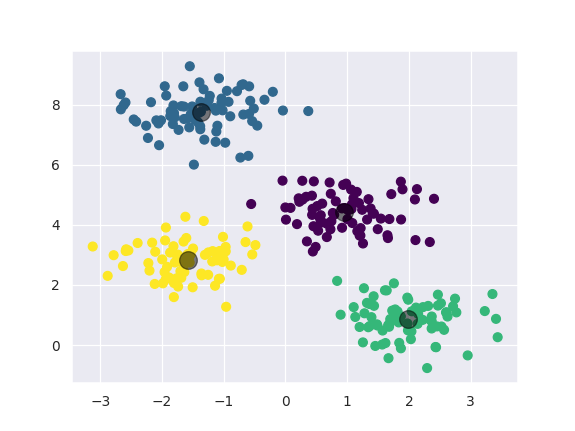

In [11]:
%matplotlib notebook
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [8]:
%matplotlib notebook
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

<IPython.core.display.Javascript object>


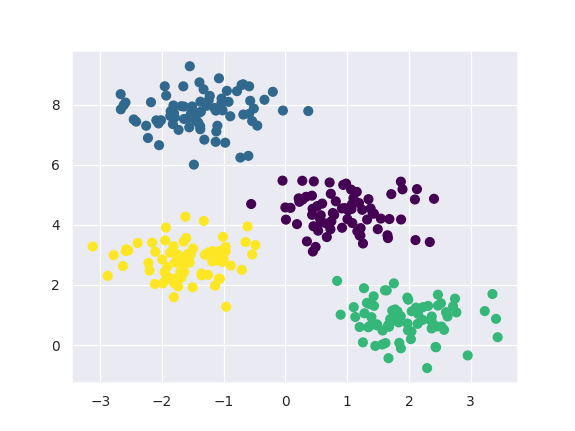

In [9]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

<IPython.core.display.Javascript object>


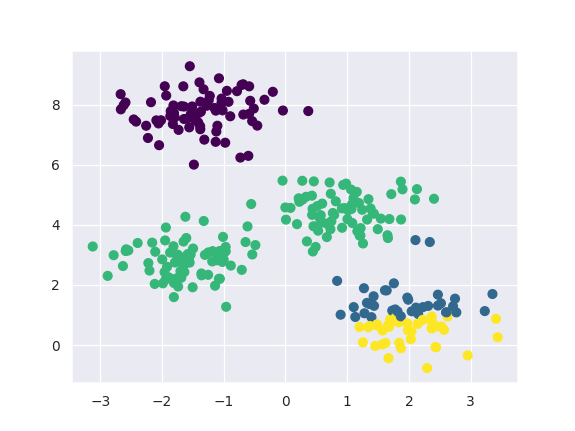

In [53]:
%matplotlib notebook
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

<IPython.core.display.Javascript object>


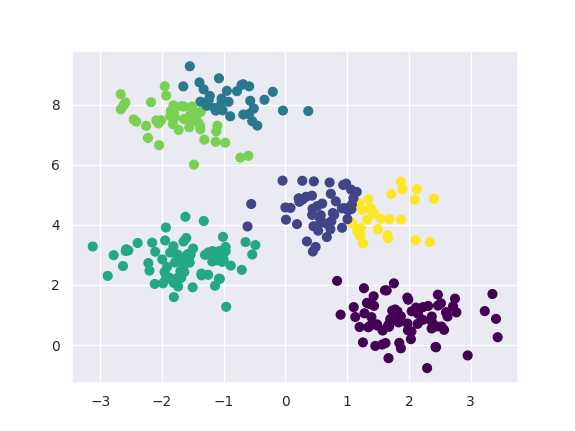

In [11]:
%matplotlib notebook
from sklearn.cluster import KMeans
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

<IPython.core.display.Javascript object>


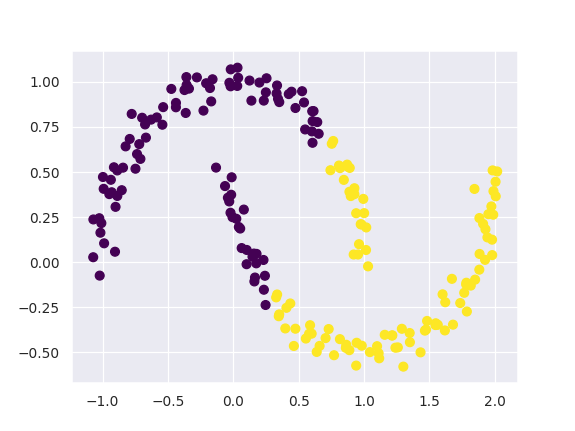

In [13]:
%matplotlib notebook
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

/home/jovyan/.local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<IPython.core.display.Javascript object>


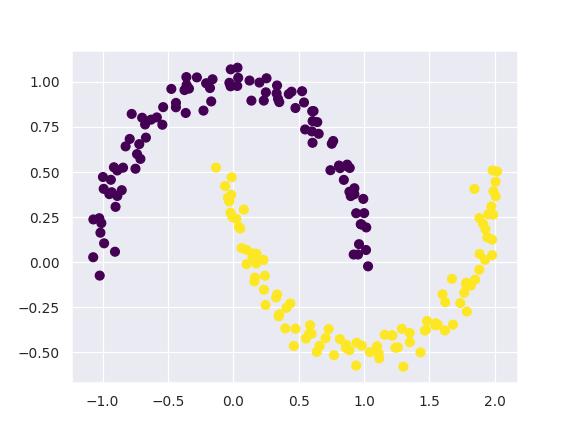

In [14]:
%matplotlib notebook
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## Reinforced learning

![](images/Reinforcement_learning_diagram.svg)

## Wrap Up

**Different Algorithms for a Fake Dataset**

<IPython.core.display.Javascript object>


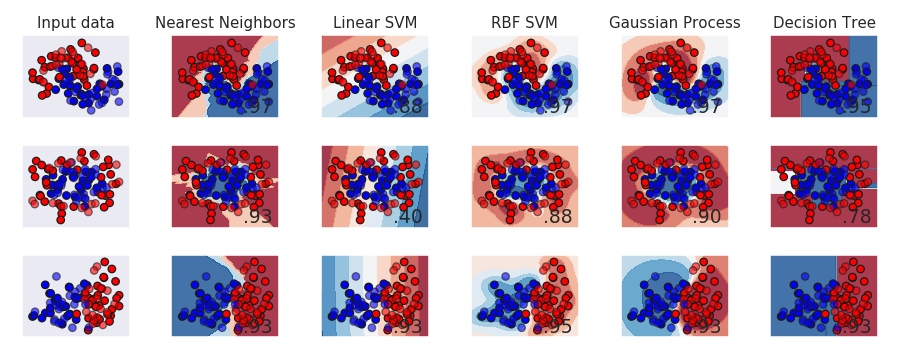

In [20]:
%matplotlib notebook
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = [
    "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
    "Decision Tree", 
#     "Random Forest", "Neural Net", "AdaBoost",
#     "Naive Bayes", "QDA"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(10, 4))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show();

* Jupyter as an online-"IDE" for DataScience
* DataScience/ML

**Thank You for your attention**

# Sources

* https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
* https://github.com/cedrickchee/fastai-part2/blob/master/kmeans_test.ipynb
* https://groups.google.com/forum/#!topic/jupyter/gWmK-ATMLvc
* http://www.visualcapitalist.com/visualizing-trillion-fold-increase-computing-power/
* https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
* https://setiathome.berkeley.edu/cpu_list.php
* https://en.wikipedia.org/wiki/Reinforcement_learning
